In [167]:
import WazeRouteCalculator
import logging
import seaborn as sns

logger = logging.getLogger('WazeRouteCalculator.WazeRouteCalculator')
logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler()
logger.addHandler(handler)

from_address = 'Avenida San Felipe 620, Jesus Maria, Lima'
to_address = 'Manuel Gonzales 740, Comas, Lima'
# region = 'EU'
route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address,)
route.calc_route_info()

From: Avenida San Felipe 620, Jesus Maria, Lima - to: Manuel Gonzales 740, Comas, Lima
Start coords: (47.597788561, 19.347304274)
End coords: (47.5960083, 18.952751159)
Time 34.88 minutes, distance 40.14 km.


(34.88333333333333, 40.139)

In [170]:
route.calc_route_info(real_time=False)

Time 35.10 minutes, distance 39.19 km.


(35.1, 39.194)

In [174]:
import datetime

In [175]:
now = datetime.datetime.now()

target_time = now.replace(hour=8, minute=0, second=0, microsecond=0) + datetime.timedelta(days=1)
time_diff = target_time - now
time_diff

datetime.timedelta(0, 48059, 571835)

In [9]:
import pandas as pd
pd.read_csv("wazeinfo_recupero.txt", sep=';', index_col=0, names=['u','v','wazeinfo'])

,v,wazeinfo
u,,


In [133]:
!ls

cache  RutasCusco_20230730170529.log  RutasCuscoWaze.txt
data   RutasCusco.ipynb		      WazeCalculator.ipynb


In [235]:
with open('RutasCusco_20230730170529.log', 'r') as file:
    logfile = file.readlines()


In [224]:
logdf = pd.DataFrame(logfile, columns=['log'])
logdf['completed'] = logdf.apply(lambda x: 'completed' in x['log'], axis=1)
logdf['errorinwazeinfo'] = logdf.apply(lambda x: 'Error in Waze' in x['log'], axis=1)

In [225]:
logdf[['completed','errorinwazeinfo']].sum()
# 27082

completed          23509
errorinwazeinfo     3574
dtype: int64

In [236]:
logfile[::len(logfile)-1]

['2023-07-30 17:05:29,695 :: INFO :: root :: 3763 :: Multiprocessing started.\n',
 '2023-07-31 19:11:31,583 :: DEBUG :: WazeRouteCalculator.WazeRouteCalculator :: 3763 :: End coords: (-13.531433, -71.9526047)\n']

In [159]:
!ls

cache  RutasCusco_20230730170529.log  RutasCuscoWaze.txt
data   RutasCusco.ipynb		      WazeCalculator.ipynb


In [122]:
import seaborn as sns

In [221]:
results = pd.read_csv('RutasCuscoWaze.txt', sep=';', index_col=0,names=['u','v','wazeinfo'])
print(results.shape)
results['wazeinfo_minutes'] = results.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[0], axis=1)
results['wazeinfo_km'] = results.apply(lambda x: x['wazeinfo'].replace('(','').replace(')','').split(',')[1], axis=1)
results[['wazeinfo_minutes', 'wazeinfo_km']] = results[['wazeinfo_minutes', 'wazeinfo_km']].astype(float)
results

# sns.histplot(results, x='wazeinfo_km', stat='probability', cumulative=True)

(27082, 3)


,u,v,wazeinfo,wazeinfo_minutes,wazeinfo_km
24000,10568914385,5600850529,"(0.016666666666666666, 0.021)",0.016667,0.021
0,30962246,3707257935,"(0.55, 0.248)",0.550000,0.248
12000,4331662268,4331662269,"(0.23333333333333334, 0.146)",0.233333,0.146
1,30962246,30962247,"(-1, -1)",-1.000000,-1.000
12001,4331662269,3311132263,"(0.06666666666666667, 0.033)",0.066667,0.033
...,...,...,...,...,...
17995,5600851245,5600851249,"(0.11666666666666667, 0.089)",0.116667,0.089
17996,5600851245,5600851249,"(0.11666666666666667, 0.089)",0.116667,0.089
17997,5600851245,5600851239,"(0.06666666666666667, 0.053)",0.066667,0.053
17998,5600851249,5600851252,"(0.26666666666666666, 0.181)",0.266667,0.181


<AxesSubplot:xlabel='wazeinfo_km', ylabel='Count'>

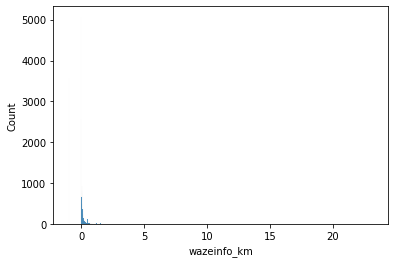

In [227]:
sns.histplot(results, x='wazeinfo_km', stat='count', )

<AxesSubplot:xlabel='wazeinfo_km'>

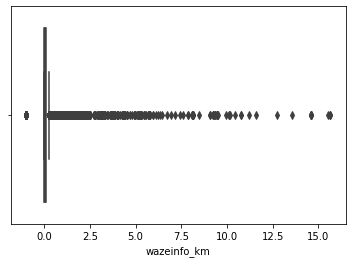

In [183]:
sns.boxplot(results['wazeinfo_km'])

<AxesSubplot:>

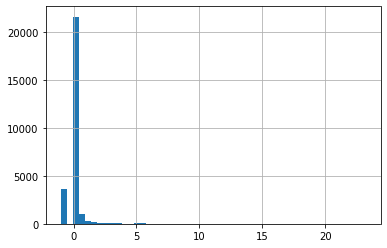

In [230]:
results['wazeinfo_km'].hist(bins=50)

<AxesSubplot:xlabel='wazeinfo_minutes', ylabel='Count'>

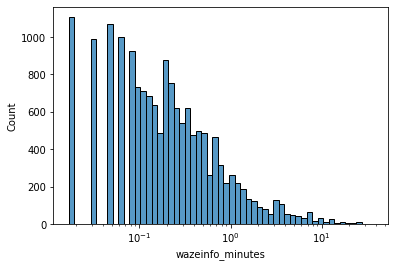

In [234]:
cond = results['wazeinfo_minutes']>0
cond
sns.histplot(results[cond], x='wazeinfo_minutes', stat='count', log_scale=True)

In [250]:
wazeinfo_recupero = pd.read_csv("wazeinfo_recupero.txt", sep=';', 
                                index_col=0, 
                                names=['u','v','wazeinfo']
                               )
print(wazeinfo_recupero.shape)
wazeinfo_recupero.head()

(394, 3)


,u,v,wazeinfo
49,30962460,30962459,"(0.11666666666666667, 0.049)"
69,30962672,30963247,"(-1, -1)"
116,30963206,30964831,"(-1, -1)"
119,30963245,30963247,"(-1, -1)"
120,30963247,30962672,"(-1, -1)"
